In [2]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import itertools
import os

batch_size = 512
num_classes = 10
epochs = 1
N_SAMPLES = 30_000

model_directory = '.'

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = X_train[0].shape

# Reshaping the data to use it in our network
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

loss = 'categorical_crossentropy'
optimizer = 'adam'

X_train = X_train[:N_SAMPLES]
X_test = X_test[:N_SAMPLES]
y_train = y_train[:N_SAMPLES]
y_test = y_test[:N_SAMPLES]

filters = [4, 8, 16]
kernal_sizes = [(2, 2), (4, 4), (16, 16)]

for n_filters, kernel_size in itertools.product(filters, kernal_sizes):
    model_name = 'single_f_' + str(n_filters) + '_k_' + str(kernel_size)

    model = Sequential(name=model_name)
    model.add(
        Conv2D(
            n_filters,
            kernel_size=kernel_size,
            activation='relu',
            input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)

#     print(f'{model_name} Test loss: { score[0]} - Test accuracy: {score[1]}')
    print(model_name, 'Test loss:', score[0], 'Test accuracy:', score[1])

    model_path = os.path.join(model_directory, model_name)
    model.save(model_path)

Train on 30000 samples, validate on 10000 samples
Epoch 1/1
30000/30000 [==============================] - 1s 30us/step - loss: 1.2839 - acc: 0.7063 - val_loss: 0.6154 - val_acc: 0.8544
single_f_4_k_(2, 2) Test loss: 0.6154446720123291 Test accuracy: 0.8544
Train on 30000 samples, validate on 10000 samples
Epoch 1/1
30000/30000 [==============================] - 2s 56us/step - loss: 0.9602 - acc: 0.7411 - val_loss: 0.4170 - val_acc: 0.8849
single_f_4_k_(4, 4) Test loss: 0.41704569212198256 Test accuracy: 0.8849
Train on 30000 samples, validate on 10000 samples
Epoch 1/1
30000/30000 [==============================] - 3s 88us/step - loss: 1.0912 - acc: 0.6962 - val_loss: 0.4498 - val_acc: 0.8709
single_f_4_k_(16, 16) Test loss: 0.4497666299700737 Test accuracy: 0.8709
Train on 30000 samples, validate on 10000 samples
Epoch 1/1
30000/30000 [==============================] - 1s 48us/step - loss: 1.5005 - acc: 0.7322 - val_loss: 0.6552 - val_acc: 0.8611
single_f_8_k_(2, 2) Test loss: 0.6552

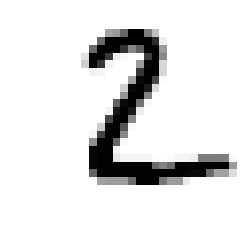

In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(X_test[1][..., 0], cmap='Greys')
plt.axis('off')
plt.show()

